In [173]:
# Data handling
import pandas as pd
import numpy as np
import re


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings (optional but clean)
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



In [174]:
#loading data
df = pd.read_csv('glassdoor_jobs.csv')
df.head(5)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [175]:
#chking nummber of features and rows
df.shape

(956, 15)

In [176]:
#colums
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [177]:
#unwanted columns
cols_to_drop = [
    'Unnamed: 0',
    'Company Name',
    'Headquarters',
    'Competitors'
]

df = df.drop(columns=cols_to_drop)


In [178]:
#new columsn
for i in df.columns:
  print(i,end="  ")#new columsn


Job Title  Salary Estimate  Job Description  Rating  Location  Size  Founded  Type of ownership  Industry  Sector  Revenue  

In [179]:
#dataset after droping colummsns
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD)
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [180]:
#number of unique vaues in each columns
for i in df.columns:
  print(i,df[i].nunique())

Job Title 328
Salary Estimate 417
Job Description 596
Rating 32
Location 237
Size 9
Founded 109
Type of ownership 13
Industry 63
Sector 25
Revenue 14


In [181]:
#cheking null values
df.isnull().sum()


Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64

In [182]:
#Checking for duplicates
df.duplicated().sum()

np.int64(356)

In [183]:
#droping  duplicates
df=df.drop_duplicates()

In [184]:
#dataset after droping duplicates
df.shape

(600, 11)

In [185]:
#copying data set for safety
df_job=df.copy()

In [186]:
#checking unique job titles
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

In [187]:
#unq job title count
df['Job Title'].nunique()

328

In [188]:
#Standardize / group job titles into broad roles
import numpy as np

df['job_role'] = df['Job Title'].str.lower()

df['job_role'] = np.where(df['job_role'].str.contains('data scientist|scientist', na=False),
                           'Data Scientist',
                    np.where(df['job_role'].str.contains('machine learning|ml engineer', na=False),
                           'Machine Learning Engineer',
                    np.where(df['job_role'].str.contains('data engineer', na=False),
                           'Data Engineer',
                    np.where(df['job_role'].str.contains('data analyst|analytics|analyst', na=False),
                           'Data Analyst',
                    np.where(df['job_role'].str.contains('software engineer|developer', na=False),
                           'Software Engineer',
                           'Other')))))


In [189]:
#count of unique job roels/titles after grouping them
df['job_role'].nunique()

6

In [190]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,job_role
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Data Scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Data Scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),Data Scientist


In [191]:
#cleaning salary estimate feature
df['Salary Estimate'].head(5)

0     $53K-$91K (Glassdoor est.)
1    $63K-$112K (Glassdoor est.)
2     $80K-$90K (Glassdoor est.)
3     $56K-$97K (Glassdoor est.)
4    $86K-$143K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [192]:
#checking the data of salaey estimate column
df['Salary Estimate'].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)', '-1',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoo

In [193]:
#some salary are in per hour ,ching for how much data we have to decide what to do with it
df['Salary Estimate'].str.contains('Per Hour', na=False).sum()


np.int64(10)

In [194]:
#salary missing 
(df['Salary Estimate'] == '-1').sum()


np.int64(133)

In [195]:
#we drop where salar is 1 and is in hours
df = df[~df['Salary Estimate'].str.contains('Per Hour', na=False)]

# Drop rows with -1 salary
df = df[df['Salary Estimate'] != '-1']


In [196]:
#verifying it after droping
df['Salary Estimate'].str.contains('Per Hour', na=False).sum()
(df['Salary Estimate'] == '-1').sum()


np.int64(0)

In [197]:
#shape after dropping the unknown salary
df.shape

(457, 12)

In [198]:
#checking the column
df['Salary Estimate'].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoor est.

In [199]:
#removing the text from column for just salary
df['Salary Estimate'] = (
    df['Salary Estimate']
    .str.replace('$', '', regex=False)
    .str.replace('K', '', regex=False)
    .str.replace('(Glassdoor est.)', '', regex=False)
    .str.replace('(Employer est.)', '', regex=False)
    .str.replace('Employer Provided Salary:', '', regex=False)
    .str.strip()
)


In [200]:
#checking if the column still ahs any text remaining
df['Salary Estimate'].unique()

array(['53-91', '63-112', '80-90', '56-97', '86-143', '71-119', '54-93',
       '86-142', '38-84', '120-160', '126-201', '64-106', '106-172',
       '46-85', '83-144', '102-190', '67-137', '118-189', '110-175',
       '64-111', '81-130', '73-119', '86-139', '63-105', '109-177',
       '63-110', '75-124', '34-61', '72-120', '93-149', '85-140',
       '77-135', '82-132', '83-137', '115-180', '74-138', '64-112',
       '68-129', '52-113', '110-150', '150-160', '158-211', '20-39',
       '56-117', '63-99', '68-114', '41-95', '86-144', '80-139', '56-95',
       '120-189', '111-176', '84-146', '107-172', '49-85', '61-109',
       '88-148', '60-99', '41-72', '96-161', '65-130', '52-81', '139-220',
       '50-102', '85-139', '74-122', '99-157', '79-222', '57-118',
       '86-141', '94-154', '37-76', '100-160', '55-100', '60-114',
       '39-68', '64-107', '31-65', '34-62', '117-231', '79-134', '52-93',
       '55-116', '72-123', '74-124', '40-73', '102-164', '89-153',
       '61-110', '65-110'

In [201]:
#creating 2 fetures from it ,min_salary and maxx_salary
df['min_salary'] = df['Salary Estimate'].str.split('-').str[0].astype(int)
df['max_salary'] = df['Salary Estimate'].str.split('-').str[1].astype(int)


In [202]:
#creating a new column avg salary
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2


In [203]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,job_role,min_salary,max_salary,avg_salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Data Scientist,53,91,72.0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Data Scientist,63,112,87.5
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),Data Scientist,80,90,85.0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),Data Scientist,56,97,76.5
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Data Scientist,86,143,114.5


In [204]:
#dropping the columns salaru etimate and job title as we ahve cleaned them and unneccesary columns am
df = df.drop(columns=['Salary Estimate','Job Title'])
df = df.drop(columns=['Founded','Revenue'])

In [205]:
#extracting skills from job description
df['Job Description'] = df['Job Description'].str.lower().fillna('')
df['job_role'] = df['job_role'].str.lower().fillna('')

# Combine text sources
text_data = df['Job Description'] + ' ' + df['job_role']


In [206]:
#creating skills columns
skills = [
    'python', 'sql', 'excel', 'r',
    'spark', 'hadoop',
    'aws', 'azure', 'gcp',
    'tableau', 'power bi',
    'tensorflow', 'pytorch',
    'machine learning', 'deep learning',
    'statistics', 'nlp'
]

def has_keyword(text, keyword):
    return int(bool(re.search(rf'\b{re.escape(keyword)}\b', text)))

for skill in skills:
    col = skill.replace(' ', '_')
    df[col] = text_data.apply(lambda x: has_keyword(x, skill))


In [207]:
#creating seniority level columns
seniority_map = {
    'junior': ['junior', 'jr', 'entry', 'associate'],
    'senior': ['senior', 'sr', 'lead', 'principal'],
    'manager': ['manager', 'head', 'director']
}

for level, keywords in seniority_map.items():
    df[f'seniority_{level}'] = text_data.apply(
        lambda x: int(any(k in x for k in keywords))
    )



In [208]:
#drop job description data
df = df.drop(columns=['Job Description'], errors='ignore')


In [209]:
df.columns

Index(['Rating', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'job_role', 'min_salary', 'max_salary', 'avg_salary', 'python', 'sql',
       'excel', 'r', 'spark', 'hadoop', 'aws', 'azure', 'gcp', 'tableau',
       'power_bi', 'tensorflow', 'pytorch', 'machine_learning',
       'deep_learning', 'statistics', 'nlp', 'seniority_junior',
       'seniority_senior', 'seniority_manager'],
      dtype='object')

In [210]:
df.head(5)

,Rating,Location,Size,Type of ownership,Industry,Sector,job_role,min_salary,max_salary,avg_salary,...,power_bi,tensorflow,pytorch,machine_learning,deep_learning,statistics,nlp,seniority_junior,seniority_senior,seniority_manager
0,3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,data scientist,53,91,72.0,...,1,0,0,1,0,0,0,0,0,0
1,3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,data scientist,63,112,87.5,...,0,0,0,1,0,1,0,0,1,0
2,4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,data scientist,80,90,85.0,...,0,0,0,1,0,1,0,1,0,1
3,3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",data scientist,56,97,76.5,...,0,0,0,1,1,1,0,0,1,1
4,2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,data scientist,86,143,114.5,...,0,0,0,1,0,1,0,0,1,0


In [211]:
#checking unq values in rating 
df['Rating'].unique()


array([ 3.8,  3.4,  4.8,  2.9,  4.1,  3.3,  4.6,  3.5,  3.2,  3.7,  3.6,
        3.9,  4.3,  4.2,  4. ,  4.7,  5. ,  3.1,  4.4,  2.8,  2.7,  1.9,
        4.5,  3. ,  2.3,  2.6, -1. ,  2.4,  2.5,  2.2,  2.1])

In [212]:
#checking for -1 rating mmeans the rating was not given
(df['Rating'] == -1).sum()


np.int64(7)

In [213]:
#imputing mean to missing values
df['Rating'] = df['Rating'].replace(-1, df['Rating'].median())


In [214]:
#checking location feature
df['Location'].unique()

array(['Albuquerque, NM', 'Linthicum, MD', 'Clearwater, FL',
       'Richland, WA', 'New York, NY', 'Dallas, TX', 'Baltimore, MD',
       'San Jose, CA', 'Rochester, NY', 'Chantilly, VA', 'Plano, TX',
       'Seattle, WA', 'Cambridge, MA', 'Newark, NJ', 'Mountain View, CA',
       'San Francisco, CA', 'Denver, CO', 'Chicago, IL', 'Louisville, KY',
       'Herndon, VA', 'Hillsboro, OR', 'Worcester, MA', 'Groton, CT',
       'Detroit, MI', 'Sunnyvale, CA', 'Ipswich, MA', 'Redlands, CA',
       'Woburn, MA', 'Fremont, CA', 'Long Beach, NY', 'Marlborough, MA',
       'Allendale, NJ', 'Washington, DC', 'Bellevue, WA', 'Longmont, CO',
       'Beavercreek, OH', 'Peoria, IL', 'Fort Lauderdale, FL',
       'Boston, MA', 'Huntsville, AL', 'Armonk, NY', 'San Diego, CA',
       'Saint Louis, MO', 'Cincinnati, OH', 'Palo Alto, CA',
       'Coraopolis, PA', 'Framingham, MA', 'Atlanta, GA',
       'Philadelphia, PA', 'Vancouver, WA', 'Indianapolis, IN',
       'Lake Forest, IL', 'Maryland Heights, MO

In [215]:
#creating a new column state 
df['State'] = df['Location'].str.split(',').str[-1].str.strip()


In [216]:
df['State'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'ID', 'RI',
       'IA', 'SC', 'KS'], dtype=object)

In [217]:
#number of states data
df['State'].value_counts()

State
CA    99
MA    58
NY    47
VA    30
IL    22
MD    22
PA    18
TX    16
WA    15
NJ    13
NC    11
FL     9
DC     9
OH     9
IN     7
TN     6
AZ     6
CO     6
MO     6
AL     6
UT     6
WI     5
MI     4
IA     3
KY     3
OR     3
GA     3
NM     2
CT     2
LA     2
NE     2
MN     2
ID     2
RI     1
SC     1
KS     1
Name: count, dtype: int64

In [218]:
#taking top 7 states and others as labled as others
top_states = df['State'].value_counts().nlargest(10).index

In [219]:
#updating as state for top7 
df['State'] = df['State'].apply(lambda x: x if x in top_states else 'Other')


In [220]:
df['State'].unique()

array(['Other', 'MD', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'IL',
       'PA'], dtype=object)

In [221]:
df.head(5)

,Rating,Location,Size,Type of ownership,Industry,Sector,job_role,min_salary,max_salary,avg_salary,...,tensorflow,pytorch,machine_learning,deep_learning,statistics,nlp,seniority_junior,seniority_senior,seniority_manager,State
0,3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,data scientist,53,91,72.0,...,0,0,1,0,0,0,0,0,0,Other
1,3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,data scientist,63,112,87.5,...,0,0,1,0,1,0,0,1,0,MD
2,4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,data scientist,80,90,85.0,...,0,0,1,0,1,0,1,0,1,Other
3,3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",data scientist,56,97,76.5,...,0,0,1,1,1,0,0,1,1,WA
4,2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,data scientist,86,143,114.5,...,0,0,1,0,1,0,0,1,0,NY


In [222]:
#drop location column
df = df.drop(columns=['Location'])


In [223]:
#unq values in Size column
df['Size'].unique()


array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [224]:
#imputing unknown and missing values with mode 
mode_size = df['Size'].mode()[0]
df['Size'] = df['Size'].replace(['Unknown', '-1'], mode_size)


In [225]:
#encoding the sixe column based on employees directly instead of catogorizing then using ordinal encoder
size_map = {
    '1 to 50 employees': 1,
    '51 to 200 employees': 2,
    '201 to 500 employees': 3,
    '501 to 1000 employees': 4,
    '1001 to 5000 employees': 5,
    '5001 to 10000 employees': 6,
    '10000+ employees': 7
}

df['Size'] = df['Size'].map(size_map)


In [226]:
df['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District', '-1'], dtype=object)

In [227]:
df = df[~(df['Type of ownership'] == '-1')]
df = df[~(df['Type of ownership'] == 'Unknown')]

In [228]:
df['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'College / University',
       'School / School District'], dtype=object)

In [229]:
df.head(5)

,Rating,Size,Type of ownership,Industry,Sector,job_role,min_salary,max_salary,avg_salary,python,...,tensorflow,pytorch,machine_learning,deep_learning,statistics,nlp,seniority_junior,seniority_senior,seniority_manager,State
0,3.8,4,Company - Private,Aerospace & Defense,Aerospace & Defense,data scientist,53,91,72.0,1,...,0,0,1,0,0,0,0,0,0,Other
1,3.4,7,Other Organization,Health Care Services & Hospitals,Health Care,data scientist,63,112,87.5,1,...,0,0,1,0,1,0,0,1,0,MD
2,4.8,4,Company - Private,Security Services,Business Services,data scientist,80,90,85.0,1,...,0,0,1,0,1,0,1,0,1,Other
3,3.8,5,Government,Energy,"Oil, Gas, Energy & Utilities",data scientist,56,97,76.5,1,...,0,0,1,1,1,0,0,1,1,WA
4,2.9,2,Company - Private,Advertising & Marketing,Business Services,data scientist,86,143,114.5,1,...,0,0,1,0,1,0,0,1,0,NY


In [230]:
#dropping the industry column bcz we have sector column and they contain simliar information na d lead to multicolinearity
df = df.drop(columns=['Industry'])


In [231]:
#Sector column
df['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [232]:
#imputing the -1 with mode
mode_sector = df['Sector'].mode()[0]
df['Sector'] = df['Sector'].replace('-1', mode_sector)


In [233]:
df['Sector'].nunique()

23

In [234]:
df.columns

Index(['Rating', 'Size', 'Type of ownership', 'Sector', 'job_role',
       'min_salary', 'max_salary', 'avg_salary', 'python', 'sql', 'excel', 'r',
       'spark', 'hadoop', 'aws', 'azure', 'gcp', 'tableau', 'power_bi',
       'tensorflow', 'pytorch', 'machine_learning', 'deep_learning',
       'statistics', 'nlp', 'seniority_junior', 'seniority_senior',
       'seniority_manager', 'State'],
      dtype='object')

In [235]:
#dropping the min and max salary as they may cause leakage
df = df.drop(columns=['min_salary', 'max_salary'])


In [236]:
df.columns

Index(['Rating', 'Size', 'Type of ownership', 'Sector', 'job_role',
       'avg_salary', 'python', 'sql', 'excel', 'r', 'spark', 'hadoop', 'aws',
       'azure', 'gcp', 'tableau', 'power_bi', 'tensorflow', 'pytorch',
       'machine_learning', 'deep_learning', 'statistics', 'nlp',
       'seniority_junior', 'seniority_senior', 'seniority_manager', 'State'],
      dtype='object')

In [237]:
#cleaned dataset copy
salary_data=df.copy()

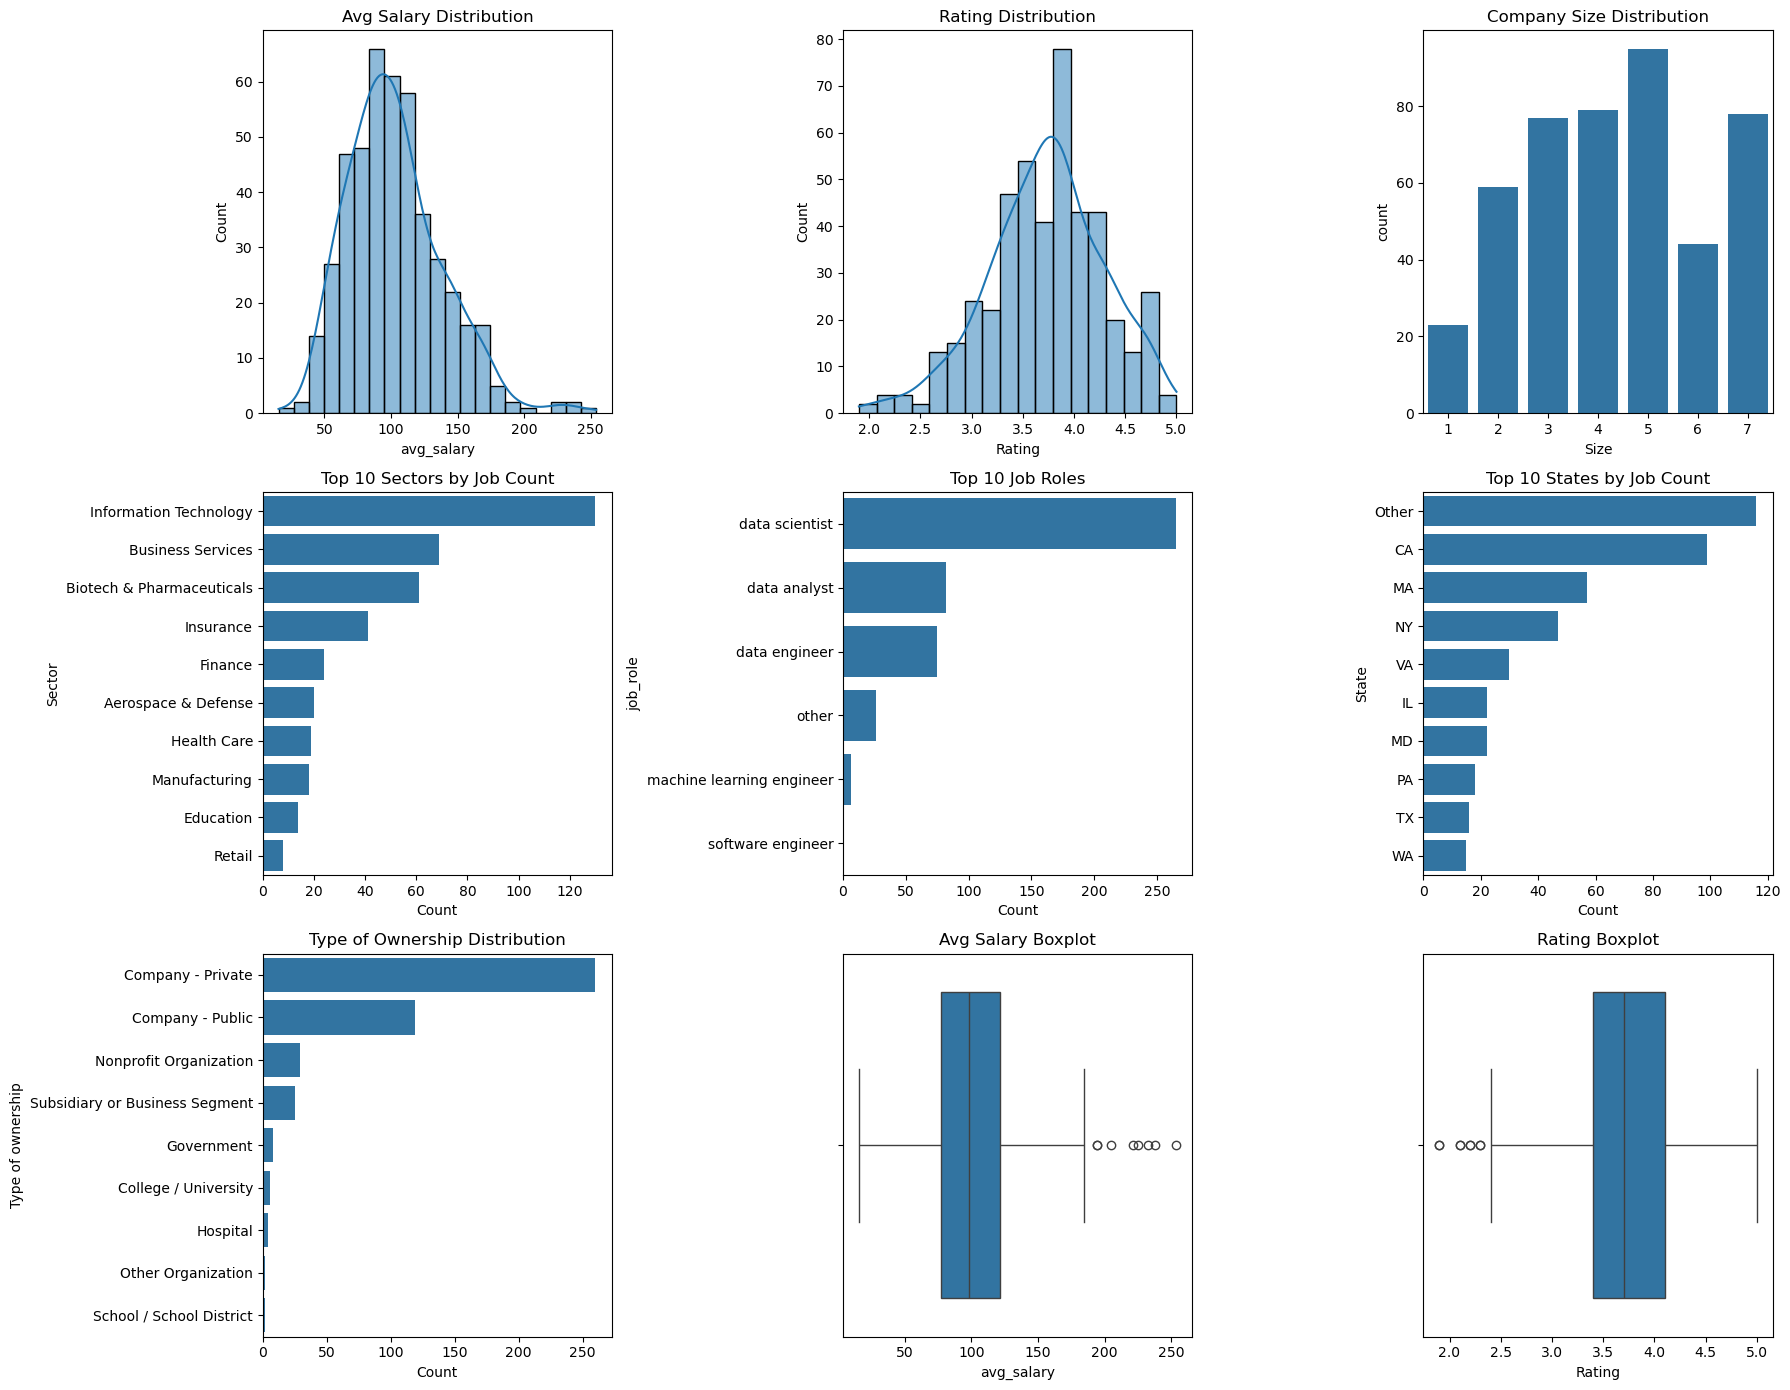

In [238]:

plt.figure(figsize=(18, 14))

# 1️⃣ Avg Salary Distribution
plt.subplot(3, 3, 1)
sns.histplot(salary_data['avg_salary'], kde=True)
plt.title('Avg Salary Distribution')

# 2️⃣ Rating Distribution
plt.subplot(3, 3, 2)
sns.histplot(salary_data['Rating'], kde=True)
plt.title('Rating Distribution')

# 3️⃣ Company Size Count
plt.subplot(3, 3, 3)
sns.countplot(x='Size', data=salary_data)
plt.title('Company Size Distribution')

# 4️⃣ Sector Job Count (Top 10)
plt.subplot(3, 3, 4)
sector_counts = salary_data['Sector'].value_counts().head(10)
sns.barplot(x=sector_counts.values, y=sector_counts.index)
plt.title('Top 10 Sectors by Job Count')
plt.xlabel('Count')

# 5️⃣ Job Role Count (Top 10)
plt.subplot(3, 3, 5)
role_counts = salary_data['job_role'].value_counts().head(10)
sns.barplot(x=role_counts.values, y=role_counts.index)
plt.title('Top 10 Job Roles')
plt.xlabel('Count')

# 6️⃣ State Job Count (Top 10)
plt.subplot(3, 3, 6)
state_counts = salary_data['State'].value_counts().head(10)
sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title('Top 10 States by Job Count')
plt.xlabel('Count')

# 7️⃣ Type of Ownership Count
plt.subplot(3, 3, 7)
ownership_counts = salary_data['Type of ownership'].value_counts()
sns.barplot(x=ownership_counts.values, y=ownership_counts.index)
plt.title('Type of Ownership Distribution')
plt.xlabel('Count')

# 8️⃣ Avg Salary Boxplot (Outliers Check)
plt.subplot(3, 3, 8)
sns.boxplot(x=salary_data['avg_salary'])
plt.title('Avg Salary Boxplot')

# 9️⃣ Rating Boxplot
plt.subplot(3, 3, 9)
sns.boxplot(x=salary_data['Rating'])
plt.title('Rating Boxplot')

plt.tight_layout()
plt.show()


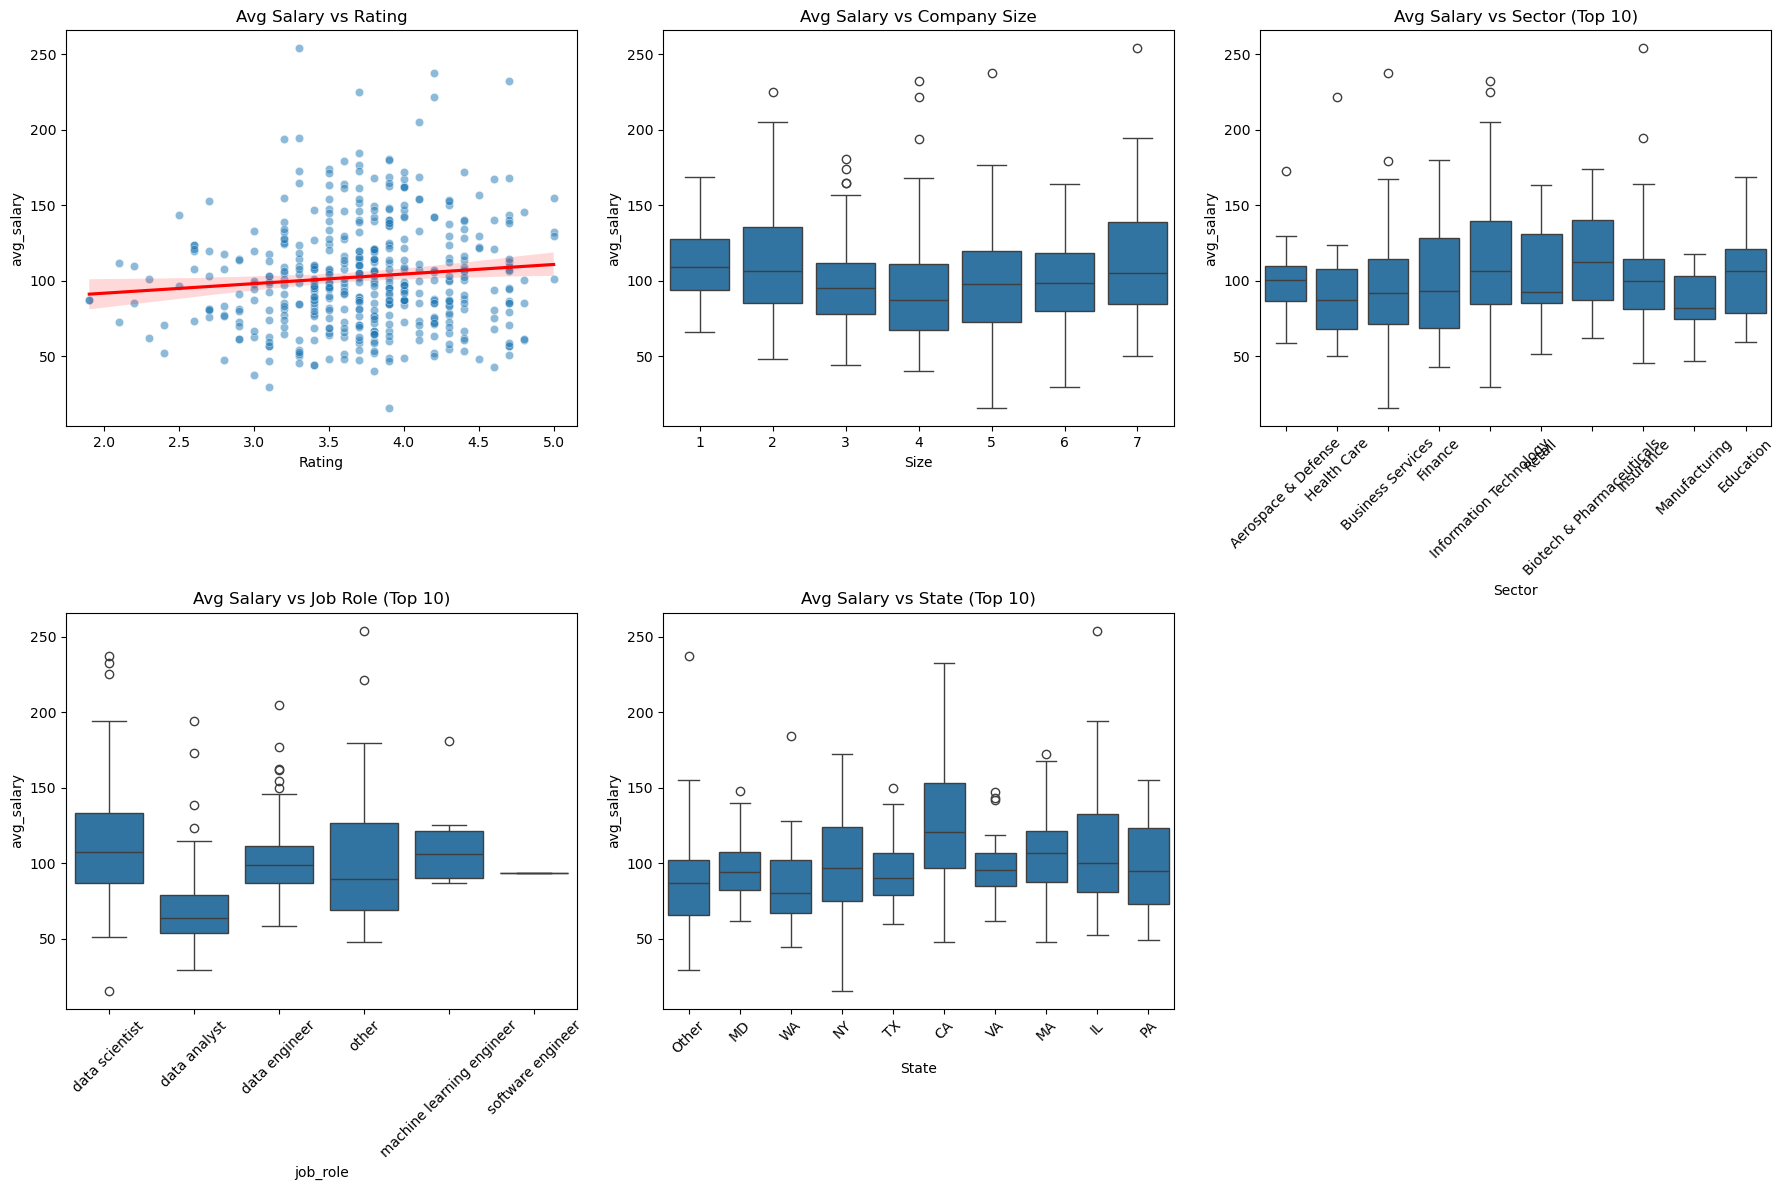

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

# 1️⃣ Avg Salary vs Rating
plt.subplot(2, 3, 1)
sns.scatterplot(
    data=salary_data,
    x='Rating',
    y='avg_salary',
    alpha=0.5
)
sns.regplot(
    data=salary_data,
    x='Rating',
    y='avg_salary',
    scatter=False,
    color='red'
)
plt.title('Avg Salary vs Rating')

# 2️⃣ Avg Salary vs Company Size
plt.subplot(2, 3, 2)
sns.boxplot(
    data=salary_data,
    x='Size',
    y='avg_salary'
)
plt.title('Avg Salary vs Company Size')

# 3️⃣ Avg Salary vs Sector (Top 10)
plt.subplot(2, 3, 3)
top_sectors = salary_data['Sector'].value_counts().head(10).index
sns.boxplot(
    data=salary_data[salary_data['Sector'].isin(top_sectors)],
    x='Sector',
    y='avg_salary'
)
plt.xticks(rotation=45)
plt.title('Avg Salary vs Sector (Top 10)')

# 4️⃣ Avg Salary vs Job Role (Top 10)
plt.subplot(2, 3, 4)
top_roles = salary_data['job_role'].value_counts().head(10).index
sns.boxplot(
    data=salary_data[salary_data['job_role'].isin(top_roles)],
    x='job_role',
    y='avg_salary'
)
plt.xticks(rotation=45)
plt.title('Avg Salary vs Job Role (Top 10)')

# 5️⃣ Avg Salary vs State (Top 10)
plt.subplot(2, 3, 5)
top_states = salary_data['State'].value_counts().head(10).index
sns.boxplot(
    data=salary_data[salary_data['State'].isin(top_states)],
    x='State',
    y='avg_salary'
)
plt.xticks(rotation=45)
plt.title('Avg Salary vs State (Top 10)')

plt.tight_layout()
plt.show()


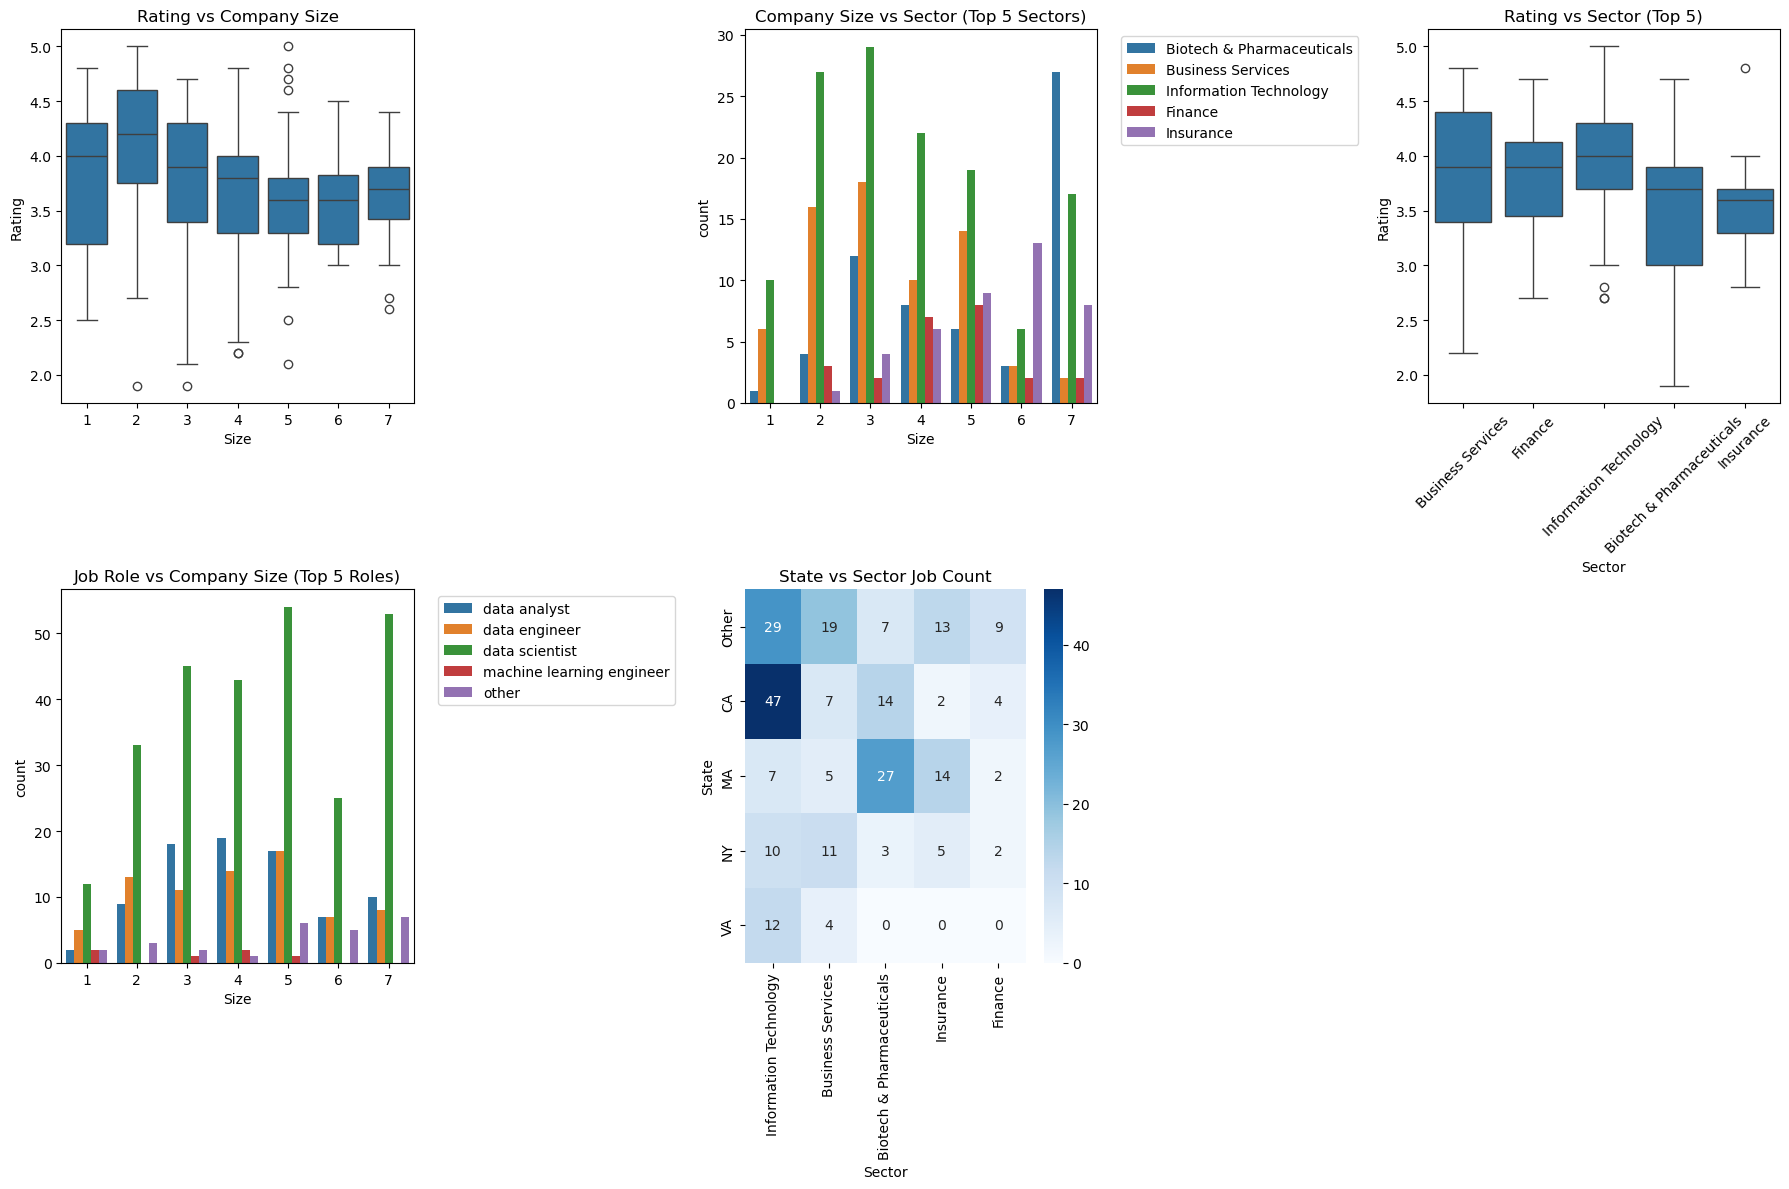

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

# 1️⃣ Rating vs Company Size
plt.subplot(2, 3, 1)
sns.boxplot(
    data=salary_data,
    x='Size',
    y='Rating'
)
plt.title('Rating vs Company Size')

# 2️⃣ Company Size vs Sector (Job Count)
plt.subplot(2, 3, 2)
sector_size = (
    salary_data
    .groupby(['Sector', 'Size'])
    .size()
    .reset_index(name='count')
)
top_sectors = salary_data['Sector'].value_counts().head(5).index
sns.barplot(
    data=sector_size[sector_size['Sector'].isin(top_sectors)],
    x='Size',
    y='count',
    hue='Sector'
)
plt.title('Company Size vs Sector (Top 5 Sectors)')
plt.legend(bbox_to_anchor=(1.05, 1))

# 3️⃣ Rating vs Sector
plt.subplot(2, 3, 3)
sns.boxplot(
    data=salary_data[salary_data['Sector'].isin(top_sectors)],
    x='Sector',
    y='Rating'
)
plt.xticks(rotation=45)
plt.title('Rating vs Sector (Top 5)')

# 4️⃣ Job Role vs Company Size (Count)
plt.subplot(2, 3, 4)
role_size = (
    salary_data
    .groupby(['job_role', 'Size'])
    .size()
    .reset_index(name='count')
)
top_roles = salary_data['job_role'].value_counts().head(5).index
sns.barplot(
    data=role_size[role_size['job_role'].isin(top_roles)],
    x='Size',
    y='count',
    hue='job_role'
)
plt.title('Job Role vs Company Size (Top 5 Roles)')
plt.legend(bbox_to_anchor=(1.05, 1))

# 5️⃣ State vs Sector (Job Count Heatmap)
plt.subplot(2, 3, 5)
top_states = salary_data['State'].value_counts().head(5).index
heatmap_data = pd.crosstab(
    salary_data['State'],
    salary_data['Sector']
).loc[top_states, top_sectors]

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title('State vs Sector Job Count')

plt.tight_layout()
plt.show()


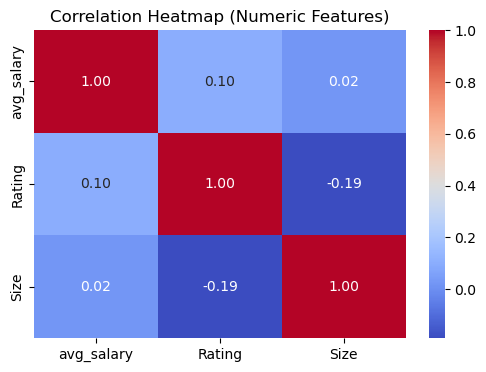

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['avg_salary', 'Rating', 'Size']

plt.figure(figsize=(6,4))
corr = salary_data[num_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


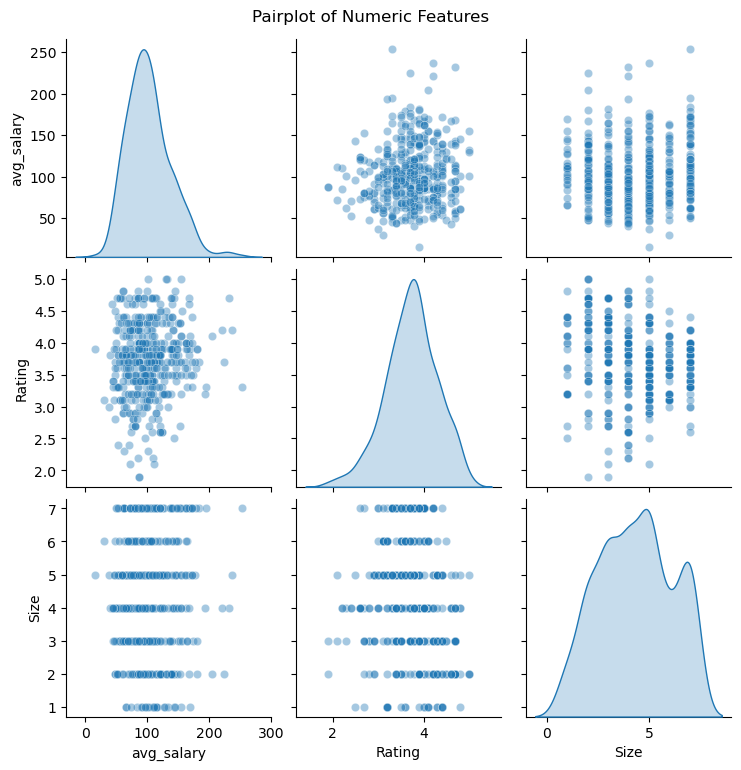

In [242]:
sns.pairplot(
    salary_data[num_cols],
    diag_kind='kde',
    plot_kws={'alpha': 0.4}
)

plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


In [243]:
salary_data.head()

,Rating,Size,Type of ownership,Sector,job_role,avg_salary,python,sql,excel,r,...,tensorflow,pytorch,machine_learning,deep_learning,statistics,nlp,seniority_junior,seniority_senior,seniority_manager,State
0,3.8,4,Company - Private,Aerospace & Defense,data scientist,72.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,Other
1,3.4,7,Other Organization,Health Care,data scientist,87.5,1,0,0,1,...,0,0,1,0,1,0,0,1,0,MD
2,4.8,4,Company - Private,Business Services,data scientist,85.0,1,1,1,1,...,0,0,1,0,1,0,1,0,1,Other
3,3.8,5,Government,"Oil, Gas, Energy & Utilities",data scientist,76.5,1,0,0,0,...,0,0,1,1,1,0,0,1,1,WA
4,2.9,2,Company - Private,Business Services,data scientist,114.5,1,1,0,1,...,0,0,1,0,1,0,0,1,0,NY


In [244]:
salary_data.columns

Index(['Rating', 'Size', 'Type of ownership', 'Sector', 'job_role',
       'avg_salary', 'python', 'sql', 'excel', 'r', 'spark', 'hadoop', 'aws',
       'azure', 'gcp', 'tableau', 'power_bi', 'tensorflow', 'pytorch',
       'machine_learning', 'deep_learning', 'statistics', 'nlp',
       'seniority_junior', 'seniority_senior', 'seniority_manager', 'State'],
      dtype='object')

In [245]:
#feature engineering
#category columns and numerical columns(already encoded)
num_cols = ['Rating','Size','python','sql','excel','r','spark','hadoop','aws','azure','gcp','tableau','power_bi','tensorflow','pytorch','machine_learning','deep_learning','statistics','nlp','seniority_junior','seniority_senior','seniority_manager']

cat_cols = ['State','Type of ownership','Sector','job_role']



In [246]:
#one hot encoding all the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)


In [247]:
#spliting train and test data
X = salary_data.drop(columns=['avg_salary'])
y = salary_data['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [248]:
#pipelines
pipe_lr = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

pipe_ridge = Pipeline([
    ('preprocess', preprocessor),
    ('model', Ridge(alpha=1.0))
])

pipe_rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

pipe_gb = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])



In [249]:
#mdoel dictonary
models = {
    'Linear Regression': pipe_lr,
    'Ridge Regression': pipe_ridge,
    'Random Forest': pipe_rf,
    'Gradient Boosting': pipe_gb
}


In [250]:
# scores
for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    print(f"{name} CV MAE: {-scores.mean():.2f}")


Linear Regression CV MAE: 26.31
Ridge Regression CV MAE: 24.75
Random Forest CV MAE: 24.30
Gradient Boosting CV MAE: 24.70


In [251]:
#Ridge regression performed well so we will be taking the ridge model
best_model = pipe_ridge


In [252]:
#paramters for hypertuning
param_grid = {
    'model__alpha': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]
}


In [253]:
#Hypertuning
ridge_grid = GridSearchCV(
    pipe_ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)


In [254]:
#training on best parameters
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['State',
                                                                          'Type '
                                                                          'of '
                                                                          'ownership',
                                                                          'Sector',
                                                                          'job_role']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['Rating',
                                                                          'Size',
                                                                          'python',
                                                                          'sql',
                                                                          'excel',
                                                                          'r',
                                                                          'spark',
                                                                          'hadoop',
                                                                          'aws',
                                                                          'azure',
                                                                          'gcp',
                                                                          'tableau',
                                                                          'power_bi',
                                                                          'tensorflow',
                                                                          'pytorch',
                                                                          'machine_learning',
                                                                          'deep_learning',
                                                                          'statistics',
                                                                          'nlp',
                                                                          'seniority_junior',
                                                                          'seniority_senior',
                                                                          'seniority_manager'])])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50,
                                          100]},
             scoring='neg_mean_absolute_error')

In [255]:
print("Best alpha:", ridge_grid.best_params_)
print("Best CV MAE:", -ridge_grid.best_score_)


Best alpha: {'model__alpha': 10}
Best CV MAE: 23.582314675137674


In [256]:
#checking weather there is improvement or not after hypertuning
# Untuned Ridge
pipe_ridge.fit(X_train, y_train)
y_pred_base = pipe_ridge.predict(X_test)

# Tuned Ridge
best_model = ridge_grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred_tuned = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error

print("Base Ridge Test MAE :", mean_absolute_error(y_test, y_pred_base))
print("Tuned Ridge Test MAE:", mean_absolute_error(y_test, y_pred_tuned))


Base Ridge Test MAE : 23.769990053712444
Tuned Ridge Test MAE: 22.40578806820246


In [257]:
#final model
final_model = ridge_grid.best_estimator_

final_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['State', 'Type of ownership',
                                                   'Sector', 'job_role']),
                                                 ('num', 'passthrough',
                                                  ['Rating', 'Size', 'python',
                                                   'sql', 'excel', 'r', 'spark',
                                                   'hadoop', 'aws', 'azure',
                                                   'gcp', 'tableau', 'power_bi',
                                                   'tensorflow', 'pytorch',
                                                   'machine_learning',
                                                   'deep_learning',
                                                   'statistics', 'nlp',
                                                   'seniority_junior',
                                                   'seniority_senior',
                                                   'seniority_manager'])])),
                ('model', Ridge(alpha=10))])

In [258]:
#predicting the value /tetsing
y_pred = final_model.predict(X_test)


In [259]:
#validating
print("Final Test MAE :", mean_absolute_error(y_test, y_pred))
print("Final Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Final Test R²  :", r2_score(y_test, y_pred))

Final Test MAE : 22.40578806820246
Final Test RMSE: 27.26301108156205
Final Test R²  : 0.28956235384939344


In [260]:
#saving model
import joblib
joblib.dump(final_model, 'model.joblib')


['model.joblib']